In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib as plt

In [2]:
anatel_file_path = '../../data/labeled_csv_files/Anatel_labeled.csv'
anatel = pd.read_csv(anatel_file_path)

### Encoding

In [3]:
# One-Hot Encoding
anatel = pd.get_dummies(anatel, columns=['Polarization'], prefix='Polarization')
anatel = pd.get_dummies(anatel, columns=['BasicFeatures'], prefix='BasicFeatures')
# Decision trees and random forests can handle boolean variables without encoding. They naturally make binary decisions based on the values of the features.

### Removing highly correlated columns

In [4]:
anatel_numeric = anatel.drop("SiteType", axis=1)
anatel_numeric.corr()
anatel = anatel.drop(columns = ["Polarization_V", "MinTxFreq", "MaxRxFreq", "BasicFeatures_G7W"])

### Removing columns of too little feature importance

In [11]:
# Must have created the feature_importance variable previously
features_of_little_importance = []
for i, importance in enumerate(feature_importances):
    if importance < 0.1:
        features_of_little_importance.append(feature_names[i])
anatel = anatel.drop(columns = features_of_little_importance)

### Running Random Forest

In [12]:
n_estimators = 100 #The number of trees in the forest.
criterion = 'gini'
random_state = 42
test_size = 0.2
max_depth = 3
min_samples_split = 2
min_samples_leaf = 1

In [13]:
X = anatel.drop('SiteType', axis=1)
y = anatel['SiteType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

rf_classifier = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state, criterion = criterion,
                                       max_depth = max_depth, min_samples_split = min_samples_split, 
                                       min_samples_leaf = min_samples_leaf)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


c:\Users\AlexFidalgoZamikhows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AlexFidalgoZamikhows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AlexFidalgoZamikhows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [15]:
feature_importances = rf_classifier.feature_importances_

### Visualizing Results

In [16]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{cr}")

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

         COW       0.00      0.00      0.00        28
    FASTSITE       0.00      0.00      0.00         3
  GREENFIELD       0.80      0.99      0.88      8509
 HARMONIZADA       0.00      0.00      0.00        26
      INDOOR       0.77      0.75      0.76       241
     OUTDOOR       0.00      0.00      0.00        33
 RAN SHARING       0.00      0.00      0.00       298
     ROOFTOP       0.77      0.05      0.10      1707
   SMALLCELL       0.88      0.42      0.57        55
 STREETLEVEL       0.00      0.00      0.00       102

    accuracy                           0.80     11002
   macro avg       0.32      0.22      0.23     11002
weighted avg       0.76      0.80      0.72     11002



AttributeError: module 'matplotlib' has no attribute 'xlabel'

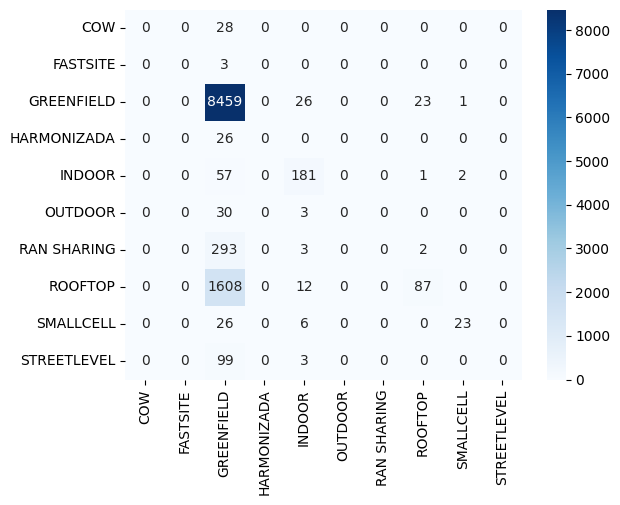

In [17]:
# Confusion Matrix
class_names = rf_classifier.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print("Feature Importances:")
feature_names = X.columns
for i, importance in enumerate(feature_importances):
    print(f"{feature_names[i]}: {importance:.4f}")

Feature Importances:
MaxTxFreq: 0.3000
AntennaGain: 0.1701
AntennaHeight: 0.3411
TransmitterPower: 0.1887
